# Miguel Ángel García Ruíz

# Taller 5: Comparación Data-MC

# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
//TFile *file = TFile::Open("Data_8TeV.root"); 
TFile *data_file = TFile::Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/Data_8TeV.root"); 
TFile *mc_file = TFile::Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/ttbar_8TeV.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *data_tree = (TTree*) data_file->Get("mini");
data_tree->Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

In [4]:
TTree *mc_tree = (TTree*) mc_file->Get("mini");
mc_tree->Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  1500000 : Total =       567791759 bytes  File  Size =  300057248 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1500000 : Total  Size=    6002049 bytes  File Size  =      31136 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression= 192.75     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  1500000 : Total  Size=    6002093 bytes  File Size  =    3819950 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression=   1.57     *
*...................................................

Activate variables 

In [5]:
Bool_t data_e_trig;
Bool_t data_mu_trig;
Bool_t data_good_vtx;
UInt_t data_lep_n;
UInt_t data_jet_n;
Float_t data_MET;
Float_t data_MET_phi;

Float_t data_lep_pt[10];  
Float_t data_lep_eta[10];  
Float_t data_lep_phi[10];  
Float_t data_lep_E[10];  
Int_t data_lep_type[10];  
Float_t data_lep_ptcone30[10];
Float_t data_lep_etcone20[10];

Float_t data_jet_pt[10];  
Float_t data_jet_eta[10];
Float_t data_jet_phi[10];
Float_t data_jet_jvf[10];
Float_t data_jet_mv1[10];
Float_t data_evtw;

data_tree->SetBranchAddress("trigE", &data_e_trig);
data_tree->SetBranchAddress("trigM", &data_mu_trig);
data_tree->SetBranchAddress("hasGoodVertex", &data_good_vtx);
data_tree->SetBranchAddress("lep_n", &data_lep_n);
data_tree->SetBranchAddress("jet_n", &data_jet_n);
data_tree->SetBranchAddress("met_et", &data_MET);
data_tree->SetBranchAddress("met_phi", &data_MET_phi);

data_tree->SetBranchAddress("lep_pt", &data_lep_pt);
data_tree->SetBranchAddress("lep_eta", &data_lep_eta);
data_tree->SetBranchAddress("lep_phi", &data_lep_phi);
data_tree->SetBranchAddress("lep_E", &data_lep_E);
data_tree->SetBranchAddress("lep_type", &data_lep_type);
data_tree->SetBranchAddress("lep_ptcone30", &data_lep_ptcone30);
data_tree->SetBranchAddress("lep_etcone20", &data_lep_etcone20);

data_tree->SetBranchAddress("jet_pt", &data_jet_pt);
data_tree->SetBranchAddress("jet_eta", &data_jet_eta);
data_tree->SetBranchAddress("jet_phi", &data_jet_phi);
data_tree->SetBranchAddress("jet_jvf", &data_jet_jvf);
data_tree->SetBranchAddress("jet_MV1", &data_jet_mv1);
data_tree->SetBranchAddress("mcWeight", &data_evtw);

Create Canvas

In [6]:
Bool_t mc_e_trig;
Bool_t mc_mu_trig;
Bool_t mc_good_vtx;
UInt_t mc_lep_n;
UInt_t mc_jet_n;
Float_t mc_MET;
Float_t mc_MET_phi;

Float_t mc_lep_pt[10];  
Float_t mc_lep_eta[10];  
Float_t mc_lep_phi[10];  
Float_t mc_lep_E[10];  
Int_t mc_lep_type[10];  
Float_t mc_lep_ptcone30[10];
Float_t mc_lep_etcone20[10];

Float_t mc_jet_pt[10];  
Float_t mc_jet_eta[10];
Float_t mc_jet_phi[10];
Float_t mc_jet_jvf[10];
Float_t mc_jet_mv1[10];

Float_t mc_evtw;
Float_t scaleFactor_PILEUP;
Float_t scaleFactor_ELE;
Float_t scaleFactor_MUON;
Float_t scaleFactor_BTAG;
Float_t scaleFactor_TRIGGER;
Float_t scaleFactor_JVFSF;
Float_t scaleFactor_ZVERTEX;

mc_tree->SetBranchAddress("trigE", &mc_e_trig);
mc_tree->SetBranchAddress("trigM", &mc_mu_trig);
mc_tree->SetBranchAddress("hasGoodVertex", &mc_good_vtx);
mc_tree->SetBranchAddress("lep_n", &mc_lep_n);
mc_tree->SetBranchAddress("jet_n", &mc_jet_n);
mc_tree->SetBranchAddress("met_et", &mc_MET);
mc_tree->SetBranchAddress("met_phi", &mc_MET_phi);

mc_tree->SetBranchAddress("lep_pt", &mc_lep_pt);
mc_tree->SetBranchAddress("lep_eta", &mc_lep_eta);
mc_tree->SetBranchAddress("lep_phi", &mc_lep_phi);
mc_tree->SetBranchAddress("lep_E", &mc_lep_E);
mc_tree->SetBranchAddress("lep_type", &mc_lep_type);
mc_tree->SetBranchAddress("lep_ptcone30", &mc_lep_ptcone30);
mc_tree->SetBranchAddress("lep_etcone20", &mc_lep_etcone20);

mc_tree->SetBranchAddress("jet_pt", &mc_jet_pt);
mc_tree->SetBranchAddress("jet_eta", &mc_jet_eta);
mc_tree->SetBranchAddress("jet_phi", &mc_jet_phi);
mc_tree->SetBranchAddress("jet_jvf", &mc_jet_jvf);
mc_tree->SetBranchAddress("jet_MV1", &mc_jet_mv1);
mc_tree->SetBranchAddress("mcWeight", &mc_evtw);

mc_tree->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP);
mc_tree->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE);
mc_tree->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON);
mc_tree->SetBranchAddress("scaleFactor_BTAG", &scaleFactor_BTAG);
mc_tree->SetBranchAddress("scaleFactor_TRIGGER", &scaleFactor_TRIGGER);
mc_tree->SetBranchAddress("scaleFactor_JVFSF", &scaleFactor_JVFSF);
mc_tree->SetBranchAddress("scaleFactor_ZVERTEX", &scaleFactor_ZVERTEX);

In [7]:
TCanvas *canvas = new TCanvas("Canvas","c",800,600);

Create histograms: Leading jet pT and all jets pT 

In [8]:
TH1F *data_cutflow = new TH1F("Data Cutflow","Cutflow; Cut; Events",10,0,10);
TH1F *data_hist_leptons_pT = new TH1F("Data Leptons pT", "Leptons pT Distribution; pT [GeV]; Events", 130, 0, 130);
TH1F *data_hist_lep_track_isolation = new TH1F("Data Track isolation", "Track Isolation Distribution; track isolation; Events", 100, 0, 0.5);
TH1F *data_hist_lep_calor_isolation = new TH1F("Data Calorimeter isolation", "Calorimeter Isolation Distribution; calorimeter isolation; Events", 100, 0, 0.5);
TH1F *data_hist_lep_eta = new TH1F("Data Lepton eta", "Lepton #eta Distribution; #eta; Events", 100, -3, 3);
TH1F *data_hist_njets = new TH1F("Data Number of jets","n-jets; Jet multiplicity; Events",4,4,8);
TH1F *data_hist_jets_pT = new TH1F("Data Jets pT", "Jets pT Distribution; pT [GeV]; Events", 100, 0, 200);
TH1F *data_hist_jets_eta = new TH1F("Data Jets eta", "Jets #eta Distribution; #eta; Events", 100, -3, 3);
TH1F *data_hist_jets_jvf = new TH1F("Data Jets jvf", "JVF Distribution; jvf; Events", 100, 0, 1);
TH1F *data_hist_jets_mv1 = new TH1F("Data Jets MV1", "Jets MV1 Distribution; mv1; Events", 100, 0, 1);
TH1F *data_hist_bjets = new TH1F("Data bjets", "b-Jets Distribution; b-jets; Events", 3, 2, 5);
TH1F *data_hist_MET = new TH1F("Data MET hist", "MET Distribution; MET [GeV]; Events", 100, 30, 200);
TH1F *data_hist_mTw = new TH1F("Data mTW hist", "mT(W) Distribution; mT(W) [GeV]; Events", 100, 30, 200);

In [9]:
TH1F *mc_cutflow = new TH1F("MC Cutflow","Cutflow; Cut; Events",10,0,10);
TH1F *mc_hist_leptons_pT = new TH1F("MC Leptons pT", "Leptons pT Distribution; pT [GeV]; Events", 130, 0, 130);
TH1F *mc_hist_lep_track_isolation = new TH1F("MC Track isolation", "Track Isolation Distribution; ; Events", 100, 0, 0.5);
TH1F *mc_hist_lep_calor_isolation = new TH1F("MC Calorimeter isolation", "Calorimeter Isolation Distribution; ; Events", 100, 0, 0.5);
TH1F *mc_hist_lep_eta = new TH1F("MC Lepton eta", "Lepton #eta Distribution; ; Events", 100, -3, 3);
TH1F *mc_hist_njets = new TH1F("MC Number of jets","n-jets; Jet multiplicity; Events",4,4,8);
TH1F *mc_hist_jets_pT = new TH1F("MC Jets pT", "Jets pT Distribution; pT [GeV]; Events", 100, 0, 200);
TH1F *mc_hist_jets_eta = new TH1F("MC Jets eta", "Jets #eta Distribution; #eta; Events", 100, -3, 3);
TH1F *mc_hist_jets_jvf = new TH1F("MC Jets jvf", "JVF Distribution; jvf; Events", 100, 0, 1);
TH1F *mc_hist_jets_mv1 = new TH1F("MC Jets MV1", "Jets MV1 Distribution; mv1; Events", 100, 0, 1);
TH1F *mc_hist_bjets = new TH1F("MC bjets", "b-Jets Distribution; b-jets; Events", 3, 2, 5);
TH1F *mc_hist_MET = new TH1F("MC MET hist", "MET Distribution; MET [GeV]; Events", 100, 30, 200);
TH1F *mc_hist_mTw = new TH1F("MC mTW hist", "mT(W) Distribution; mT(W) [GeV]; Events", 100, 30, 200);

Loop and fill histograms

In [10]:
int data_nentries, data_nbytes;
data_nentries = (Int_t)data_tree->GetEntries();

int data_cut1 = 0;
int data_cut2 = 0;
int data_cut3 = 0;
int data_cut4 = 0;
int data_cut5 = 0;
int data_cut6 = 0;
int data_cut7 = 0;
int data_cut8 = 0;


for (int i = 0; i < data_nentries; i++)
{
    data_nbytes = data_tree->GetEntry(i);   

    //First cut: Good vertex
    if(!data_good_vtx) continue;
    data_cut1++;
    data_cutflow->Fill(1);

    //Second cut: Trigger
    if(!data_e_trig && !data_mu_trig) continue;
    data_cut2++;
    data_cutflow->Fill(2);
        
    // Preselection of good leptons                                                                                
    int data_n_mu=0;
    int data_n_el=0;
    int data_n_lep=0;
    unsigned int data_goodlep_index=0;
    
    //Loop over leptons
    for(unsigned int i=0; i<data_lep_n; i++){
        if( data_lep_pt[i] < 25000.) continue; 
        if( data_lep_ptcone30[i]/data_lep_pt[i] > 0.15 ) continue; 
        if( data_lep_etcone20[i]/data_lep_pt[i] > 0.15 ) continue;  
        if( data_lep_type[i]==13 && TMath::Abs(data_lep_eta[i]) < 2.5 ){
            data_n_mu++;}
        /*
        To complete: Add electrons and extract the index for the good lepton
        */        
        //////////////
        if( data_lep_type[i]==11 && TMath::Abs(data_lep_eta[i]) < 2.47 && 
           (TMath::Abs(data_lep_eta[i]) < 1.37 || TMath::Abs(data_lep_eta[i]) > 1.52) ){
            data_n_el++;}
        //////////////
        
        data_goodlep_index=i;        
        data_n_lep++;
        }
    
     //Select events with only 1 good lepton and fill the cutflow histogram 
    //Example:
    //Third cut (one good lepton):
    if(data_n_lep!=1) continue;
    data_cutflow->Fill(3); 
    data_cut3++;
    
    for(unsigned int i=0; i<data_lep_n; i++) // Fill histograms of leptons after cut 3(goodlepton=1)
    {
        data_hist_leptons_pT->Fill(data_lep_pt[i]/1000., 1.);//Fill lepton pT distribution before applying cut of good leptons
        data_hist_lep_track_isolation->Fill(data_lep_ptcone30[i]/data_lep_pt[i], 1.);//Fill track isolation before applying cut of good leptons
        data_hist_lep_calor_isolation->Fill(data_lep_etcone20[i]/data_lep_pt[i], 1.);//Fill calorimeter isolation before applying cut of good leptons
        data_hist_lep_eta->Fill(data_lep_eta[i], 1.);//Fill eta distribution before applying cut of good leptons
    }
    
    int data_n_goodjets=0;
    int data_n_bjets=0;
    
    //Fourth cut: At least 4 jets
    if(data_jet_n<4) continue; 
    data_cutflow->Fill(4); 
    data_cut4++;
    
    //Number of jets distribution
    data_hist_njets->Fill(data_jet_n);
    
    for(unsigned int i=0; i<data_jet_n; i++) //Fill jets distribution after cut 4 (At leats 4 jets)
    {
        data_hist_jets_pT->Fill(data_jet_pt[i]/1000.);//Fill jet pT distribution before applying cut of at least 4 jets
        data_hist_jets_eta->Fill(data_jet_eta[i]);//Fill jet eta distribution before applying cut of at least 4 jets
        data_hist_jets_jvf->Fill(data_jet_jvf[i]);//Fill jet jvf distribution before applying cut of at least 4 jets
        data_hist_jets_mv1->Fill(data_jet_mv1[i]);//Fill jet mv1 distribution before applying cut of at least 4 jets
    }

    for(unsigned int j=0; j<data_jet_n; j++){
        // To complete: apply jet cuts to find the good jets
        //pT cut
        if(data_jet_pt[j] <= 25000.) continue;
        
        //Eta cut
        //////////////////////////////////
        if(TMath::Abs(data_jet_eta[j]) >= 2.5) continue;
        //////////////////////////////////
        
        // JVF cleaning    
        ////////////////////////////////// pT<50GeV => (|eta|<2.4 and |JVF|>0.5)
       
        if(data_jet_pt[j] < 50000.)
        {
            if(TMath::Abs(data_jet_eta[j]) >= 2.4 || TMath::Abs(data_jet_jvf[j]) <= 0.5){
                continue;
            }
        }
        //////////////////////////////////
        
        data_n_goodjets++;
        
        // cut on 0.7892 MV1 and count the number of b-jets
        //////////////////////////////////
        if(data_jet_mv1[j] < 0.7892) continue;
        //////////////////////////////////
        
        data_n_bjets++;
        }
    
    //Fifth cut: At least 4 good jets
    if(data_n_goodjets<4) continue; 
    data_cutflow->Fill(5); 
    data_cut5++;
    
    //Sixth cut: at least two b-jet 
    if(data_n_bjets<2) continue;
    /////////////////////////////////////////////////
    //cutflow
    data_cutflow->Fill(6);
    data_cut6++;
    /////////////////////////////////////////////////
    
    data_hist_bjets->Fill(data_n_bjets); //Fill data hist bjets after cut 6 (At least 2 bjets)
    
    //Seventh cut: MET > 30 GeV
    if(data_MET<30000.) continue;
    /////////////////////////////////////////////////
    //cutflow
    data_cutflow->Fill(7);
    data_cut7++;
    /////////////////////////////////////////////////
    
    data_hist_MET->Fill(data_MET/1000.); // Fill hist MET after cut 7 (MET<30GeV)
    
    // TLorentzVector definitions                                                               
    TLorentzVector data_Lepton  = TLorentzVector();
    TLorentzVector  data_MeT  = TLorentzVector();

    //To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().
    ///////////////////////////////////////////////////////////
    
    data_Lepton.SetPtEtaPhiE(data_lep_pt[data_goodlep_index], data_lep_eta[data_goodlep_index], data_lep_phi[data_goodlep_index], data_lep_E[data_goodlep_index]);

    data_MeT.SetPtEtaPhiE(data_MET, 0, data_MET_phi , data_MET);
    
    //Calculation of the mTW using TLorentz vectors             
    float data_mTW = sqrt(2*data_Lepton.Pt()*data_MeT.Et()*(1-cos(data_Lepton.DeltaPhi(data_MeT))));

    //Eight cut: mTW > 30 GeV
    /////////////////////////////////////////////////
    if(data_mTW <= 30000.) continue;
    data_cutflow->Fill(8);
    data_cut8++;
    
    data_hist_mTw->Fill(data_mTW/1000.); // Fill mTW after cut 8 (mTW>30GeV)
    
}

std::cout << "Done!" << std::endl;
std::cout << "All events:              " << data_nentries << std::endl;
std::cout << "Cut1: One good vertex:   " << data_cut1 << std::endl;
std::cout << "Cut2: Trigger 1 lep:     " << data_cut2 << std::endl;
std::cout << "Cut3: 1 good lepton:     " << data_cut3 << std::endl;
std::cout << "Cut4: At leats 4 jets:   " << data_cut4 << std::endl;
std::cout << "Cut5: At least 4 gjets:  " << data_cut5 << std::endl;
std::cout << "Cut6: At least 2 b jets: " << data_cut6 << std::endl;
std::cout << "Cut7: MET > 30 GeV:      " << data_cut7 << std::endl;
std::cout << "Cut8: mTW > 30 GeV:      " << data_cut8 << std::endl;

std::cout << "Done!" << endl;

Done!
All events:              14945674
Cut1: One good vertex:   14656440
Cut2: Trigger 1 lep:     14656440
Cut3: 1 good lepton:     11561801
Cut4: At leats 4 jets:   61995
Cut5: At least 4 gjets:  59797
Cut6: At least 2 b jets: 10655
Cut7: MET > 30 GeV:      8451
Cut8: mTW > 30 GeV:      7093
Done!


<p>Draw</p>

In [11]:
float red_eff = 0.072212854;
float xsec = 0.13729749; //fb
float N_mc = 49973332;
float data_lumi = 1; //fb^-1
float mc_lumi = N_mc*red_eff/xsec;

weight = data_lumi/mc_lumi;

cout << mc_lumi << endl;
cout << weight << endl;

2.62839e+07
3.80461e-08


In [12]:
int mc_nentries, mc_nbytes;
mc_nentries = (Int_t)mc_tree->GetEntries();

int mc_cut1 = 0;
int mc_cut2 = 0;
int mc_cut3 = 0;
int mc_cut4 = 0;
int mc_cut5 = 0;
int mc_cut6 = 0;
int mc_cut7 = 0;
int mc_cut8 = 0;


for (int i = 0; i < mc_nentries; i++)
{
    mc_nbytes = mc_tree->GetEntry(i); 
    
    //Computing the total event weight
    
    float_t ScaleFactor = scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_BTAG*scaleFactor_TRIGGER*scaleFactor_JVFSF*scaleFactor_ZVERTEX;
    float_t total_evtw = ScaleFactor*mc_evtw*weight; //Scale Factors times montecarlo evtw times weight by luminosity division

    //First cut: Good vertex
    if(!mc_good_vtx) continue;
    mc_cut1++;
    mc_cutflow->Fill(1, total_evtw);

    //Second cut: Trigger
    if(!mc_e_trig && !mc_mu_trig) continue;
    mc_cut2++;
    mc_cutflow->Fill(2, total_evtw);
        
    // Preselection of good leptons                                                                                
    int mc_n_mu=0;
    int mc_n_el=0;
    int mc_n_lep=0;
    unsigned int mc_goodlep_index=0;
    
    //Loop over leptons
    for(unsigned int i=0; i<mc_lep_n; i++){
        if( mc_lep_pt[i] < 25000.) continue; 
        if( mc_lep_ptcone30[i]/mc_lep_pt[i] > 0.15 ) continue; 
        if( mc_lep_etcone20[i]/mc_lep_pt[i] > 0.15 ) continue;  
        if( mc_lep_type[i]==13 && TMath::Abs(mc_lep_eta[i]) < 2.5 ){
            mc_n_mu++;}
        /*
        To complete: Add electrons and extract the index for the good lepton
        */        
        //////////////
        if( mc_lep_type[i]==11 && TMath::Abs(mc_lep_eta[i]) < 2.47 && (TMath::Abs(mc_lep_eta[i]) < 1.37 || TMath::Abs(mc_lep_eta[i]) > 1.52) ){
            mc_n_el++;}
        //////////////
        //Fill histogram distribution of lepton pT
        //hist_leptons_pT->Fill(lep_pt[i]/1000., evtw);
        mc_goodlep_index=i;        
        mc_n_lep++;
        }
    
     //Select events with only 1 good lepton and fill the cutflow histogram 
    //Example:
    //Third cut (one good lepton):
    if(mc_n_lep!=1) continue;
    mc_cutflow->Fill(3, total_evtw); 
    mc_cut3++;
    
    for(unsigned int i=0; i<mc_lep_n; i++) // Fill histograms of leptons after cut 3(goodlepton=1)
    {
        mc_hist_leptons_pT->Fill(mc_lep_pt[i]/1000., total_evtw);//Fill lepton pT distribution after applying cut of good leptons
        mc_hist_lep_track_isolation->Fill(mc_lep_ptcone30[i]/mc_lep_pt[i], total_evtw);//Fill track isolation after applying cut of good leptons
        mc_hist_lep_calor_isolation->Fill(mc_lep_etcone20[i]/mc_lep_pt[i], total_evtw);//Fill calorimeter isolation after applying cut of good leptons
        mc_hist_lep_eta->Fill(mc_lep_eta[i], total_evtw);//Fill eta distribution after applying cut of good leptons
    }
    
    int mc_n_goodjets=0;
    int mc_n_bjets=0;
    
    //Fourth cut: At least 4 jets
    if(mc_jet_n<4) continue; 
    mc_cutflow->Fill(4, total_evtw); 
    mc_cut4++;
    
    //Number of jets distribution
    mc_hist_njets->Fill(mc_jet_n, total_evtw);
    
    for(unsigned int i=0; i<mc_jet_n; i++)
    {
        mc_hist_jets_pT->Fill(mc_jet_pt[i]/1000., total_evtw);//Fill jet pT distribution before applying cut of at least 4 jets
        mc_hist_jets_eta->Fill(mc_jet_eta[i], total_evtw);//Fill jet eta distribution before applying cut of at least 4 jets
        mc_hist_jets_jvf->Fill(mc_jet_jvf[i], total_evtw);//Fill jet jvf distribution before applying cut of at least 4 jets
        mc_hist_jets_mv1->Fill(mc_jet_mv1[i], total_evtw);//Fill jet mv1 distribution before applying cut of at least 4 jets
    }

    for(unsigned int j=0; j<mc_jet_n; j++){
        // To complete: apply jet cuts to find the good jets
        //pT cut
        if(mc_jet_pt[j] <= 25000.) continue;
        
        //Eta cut
        //////////////////////////////////
        if(TMath::Abs(mc_jet_eta[j]) >= 2.5) continue;
        //////////////////////////////////
        
        // JVF cleaning    
        ////////////////////////////////// pT<50GeV => (|eta|<2.4 and |JVF|>0.5)
       
        if(mc_jet_pt[j] < 50000.)
        {
            if(TMath::Abs(mc_jet_eta[j]) >= 2.4 || TMath::Abs(mc_jet_jvf[j]) <= 0.5){
                continue;
            }
        }
        //////////////////////////////////
        
        mc_n_goodjets++;
        
        // cut on 0.7892 MV1 and count the number of b-jets
        //////////////////////////////////
        if(mc_jet_mv1[j] < 0.7892) continue;
        //////////////////////////////////
        
        mc_n_bjets++;
        }
    
    //Fifth cut: At least 4 good jets
    if(mc_n_goodjets<4) continue; 
    mc_cutflow->Fill(5, total_evtw); 
    mc_cut5++;
    
    //Sixth cut: at least two b-jet 
    if(mc_n_bjets<2) continue;
    /////////////////////////////////////////////////
    //cutflow
    mc_cutflow->Fill(6, total_evtw);
    mc_cut6++;
    /////////////////////////////////////////////////
    
    mc_hist_bjets->Fill(mc_n_bjets, total_evtw); // Fill hist bjets after cut 6 (At least 2 bjets)
    
    //Seventh cut: MET > 30 GeV
    if(mc_MET<30000.) continue;
    /////////////////////////////////////////////////
    //cutflow
    mc_cutflow->Fill(7, total_evtw);
    mc_cut7++;
    /////////////////////////////////////////////////
    
    mc_hist_MET->Fill(mc_MET/1000., total_evtw); // Fill hist MET after cut 7 (MET<30GeV)
    
    // TLorentzVector definitions                                                               
    TLorentzVector mc_Lepton  = TLorentzVector();
    TLorentzVector  mc_MeT  = TLorentzVector();

    //To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().
    ///////////////////////////////////////////////////////////
    
    mc_Lepton.SetPtEtaPhiE(mc_lep_pt[mc_goodlep_index], mc_lep_eta[mc_goodlep_index], mc_lep_phi[mc_goodlep_index], mc_lep_E[mc_goodlep_index]);

    mc_MeT.SetPtEtaPhiE(mc_MET, 0, mc_MET_phi, mc_MET);
    
    //Calculation of the mTW using TLorentz vectors             
    float mc_mTW = sqrt(2*mc_Lepton.Pt()*mc_MeT.Et()*(1-cos(mc_Lepton.DeltaPhi(mc_MeT))));

    //Eight cut: mTW > 30 GeV
    /////////////////////////////////////////////////
    if(mc_mTW <= 30000.) continue;
    mc_cutflow->Fill(8, total_evtw);
    mc_cut8++;
    
    mc_hist_mTw->Fill(mc_mTW/1000., total_evtw); //Fill mTW after applying cut 8 (mTW>30GeV)
    
}

std::cout << "Done!" << std::endl;
std::cout << "All events:              " << mc_nentries << std::endl;
std::cout << "Cut1: One good vertex:   " << mc_cut1 << std::endl;
std::cout << "Cut2: Trigger 1 lep:     " << mc_cut2 << std::endl;
std::cout << "Cut3: 1 good lepton:     " << mc_cut3 << std::endl;
std::cout << "Cut4: At leats 4 jets:   " << mc_cut4 << std::endl;
std::cout << "Cut5: At least 4 gjets:  " << mc_cut5 << std::endl;
std::cout << "Cut6: At least 2 b jets: " << mc_cut6 << std::endl;
std::cout << "Cut7: MET > 30 GeV:      " << mc_cut7 << std::endl;
std::cout << "Cut8: mTW > 30 GeV:      " << mc_cut8 << std::endl;

std::cout << "Done!" << endl;

Done!
All events:              1500000
Cut1: One good vertex:   1499487
Cut2: Trigger 1 lep:     1499487
Cut3: 1 good lepton:     1339289
Cut4: At leats 4 jets:   624850
Cut5: At least 4 gjets:  614085
Cut6: At least 2 b jets: 257355
Cut7: MET > 30 GeV:      212432
Cut8: mTW > 30 GeV:      179185
Done!


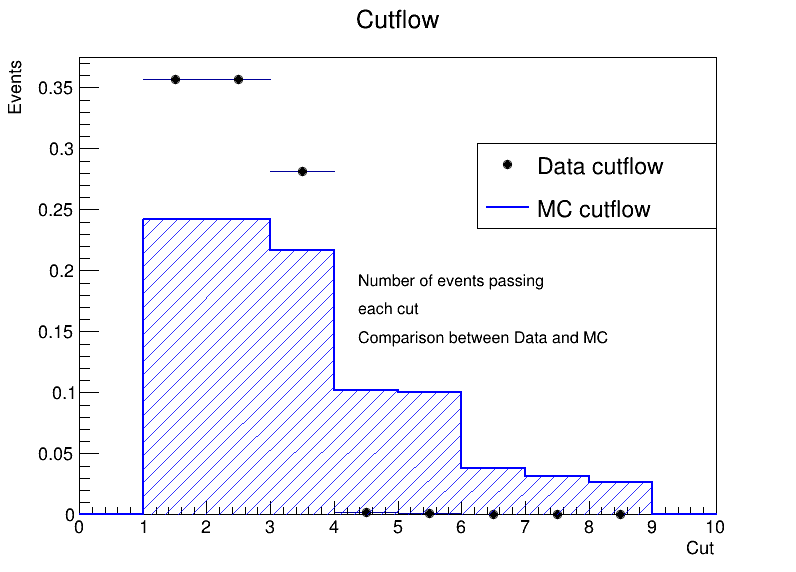

Info in <TCanvas::Print>: pdf file cutflow_DMC.pdf has been created


In [13]:
TLegend *leg1 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_cutflow->SetMarkerStyle(20);
data_cutflow->SetMarkerColor(kBlack);
data_cutflow->SetStats(0);
mc_cutflow->SetFillStyle(3454);
mc_cutflow->SetFillColorAlpha(kBlue, 0.8);
mc_cutflow->SetLineColor(kBlue);
mc_cutflow->SetMarkerSize(0);
mc_cutflow->SetStats(0);
mc_cutflow->SetLineWidth(2);

data_cutflow->DrawNormalized("P");
mc_cutflow->DrawNormalized("sameH");

leg1->AddEntry(data_cutflow, "Data cutflow", "p");
leg1->AddEntry(mc_cutflow, "MC cutflow", "l");
leg1->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.45,0.5,"Number of events passing"); // Position of the text in the canvas
l.DrawLatex(0.45,0.45,"each cut");
l.DrawLatex(0.45,0.40,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("cutflow_DMC.pdf");

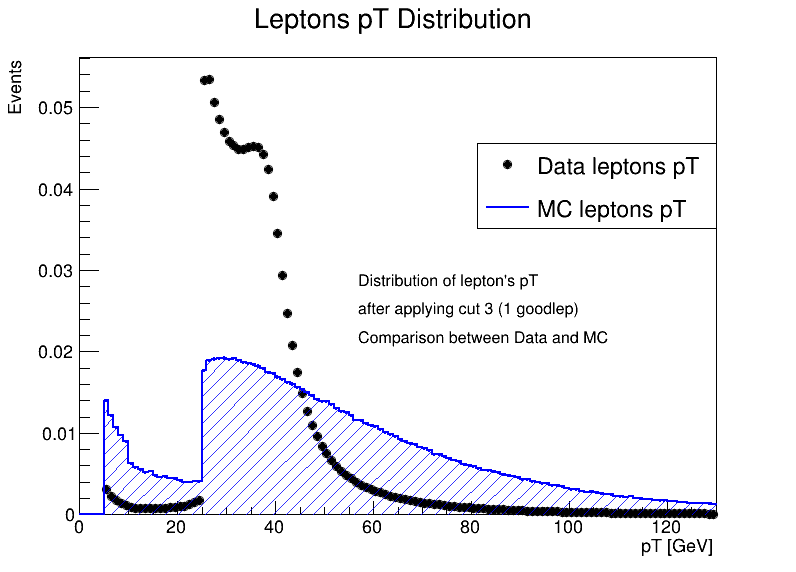

Info in <TCanvas::Print>: pdf file Distribution_leptons_pT_DMC.pdf has been created


In [14]:
TLegend *leg2 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_leptons_pT->SetMarkerStyle(20);
data_hist_leptons_pT->SetMarkerColor(kBlack);
data_hist_leptons_pT->SetStats(0);
mc_hist_leptons_pT->SetFillStyle(3454);
mc_hist_leptons_pT->SetFillColorAlpha(kBlue, 0.8);
mc_hist_leptons_pT->SetLineColor(kBlue);
mc_hist_leptons_pT->SetMarkerSize(0);
mc_hist_leptons_pT->SetStats(0);
mc_hist_leptons_pT->SetLineWidth(2);

data_hist_leptons_pT->DrawNormalized("P");
mc_hist_leptons_pT->DrawNormalized("sameH");

leg2->AddEntry(data_hist_leptons_pT, "Data leptons pT", "p");
leg2->AddEntry(mc_hist_leptons_pT, "MC leptons pT", "l");
leg2->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.45,0.5,"Distribution of lepton's pT"); // Position of the text in the canvas
l.DrawLatex(0.45,0.45,"after applying cut 3 (1 goodlep)");
l.DrawLatex(0.45,0.40,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("Distribution_leptons_pT_DMC.pdf");

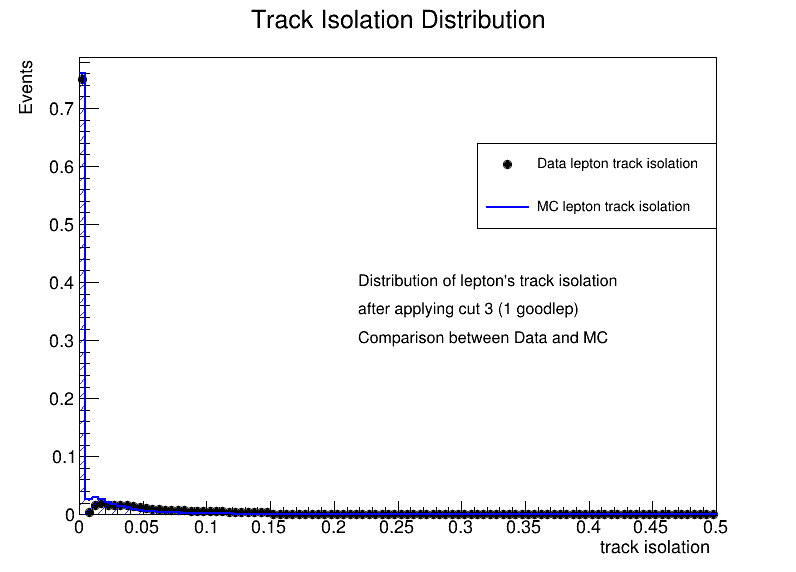

Info in <TCanvas::Print>: pdf file Distribution_leptons_track_isolation_DMC.pdf has been created


In [15]:
TLegend *leg3 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_lep_track_isolation->SetMarkerStyle(20);
data_hist_lep_track_isolation->SetMarkerColor(kBlack);
data_hist_lep_track_isolation->SetStats(0);
mc_hist_lep_track_isolation->SetFillStyle(3454);
mc_hist_lep_track_isolation->SetFillColorAlpha(kBlue, 0.8);
mc_hist_lep_track_isolation->SetLineColor(kBlue);
mc_hist_lep_track_isolation->SetMarkerSize(0);
mc_hist_lep_track_isolation->SetStats(0);
mc_hist_lep_track_isolation->SetLineWidth(2);

data_hist_lep_track_isolation->DrawNormalized("P");
mc_hist_lep_track_isolation->DrawNormalized("sameH");

leg3->AddEntry(data_hist_lep_track_isolation, "Data lepton track isolation", "p");
leg3->AddEntry(mc_hist_lep_track_isolation, "MC lepton track isolation", "l");
leg3->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.45,0.5,"Distribution of lepton's track isolation"); // Position of the text in the canvas
l.DrawLatex(0.45,0.45,"after applying cut 3 (1 goodlep)");
l.DrawLatex(0.45,0.40,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("Distribution_leptons_track_isolation_DMC.pdf");

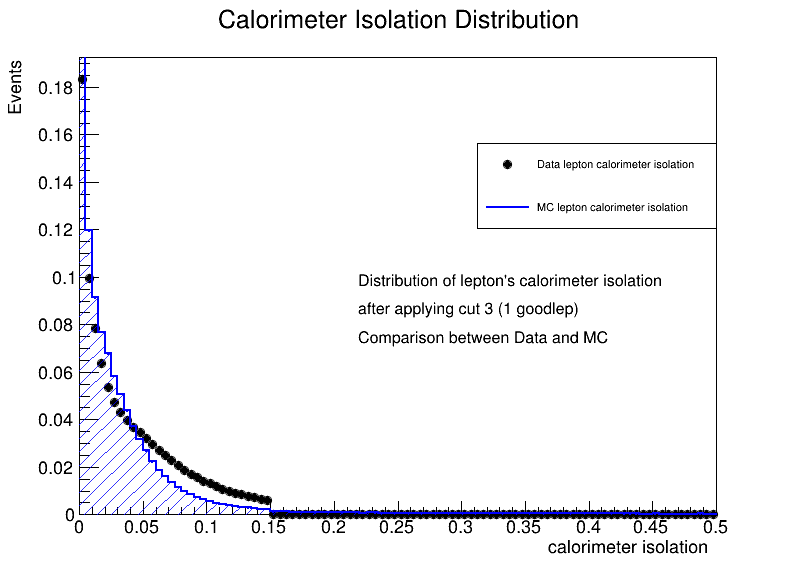

Info in <TCanvas::Print>: pdf file Distribution_leptons_calo_isolation_DMC.pdf has been created


In [16]:
TLegend *leg4 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_lep_calor_isolation->SetMarkerStyle(20);
data_hist_lep_calor_isolation->SetMarkerColor(kBlack);
data_hist_lep_calor_isolation->SetStats(0);
mc_hist_lep_calor_isolation->SetFillStyle(3454);
mc_hist_lep_calor_isolation->SetFillColorAlpha(kBlue, 0.8);
mc_hist_lep_calor_isolation->SetLineColor(kBlue);
mc_hist_lep_calor_isolation->SetMarkerSize(0);
mc_hist_lep_calor_isolation->SetStats(0);
mc_hist_lep_calor_isolation->SetLineWidth(2);

data_hist_lep_calor_isolation->DrawNormalized("P");
mc_hist_lep_calor_isolation->DrawNormalized("sameH");

leg4->AddEntry(data_hist_lep_calor_isolation, "Data lepton calorimeter isolation", "p");
leg4->AddEntry(mc_hist_lep_calor_isolation, "MC lepton calorimeter isolation", "l");
leg4->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.45,0.5,"Distribution of lepton's calorimeter isolation"); // Position of the text in the canvas
l.DrawLatex(0.45,0.45,"after applying cut 3 (1 goodlep)");
l.DrawLatex(0.45,0.40,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("Distribution_leptons_calo_isolation_DMC.pdf");

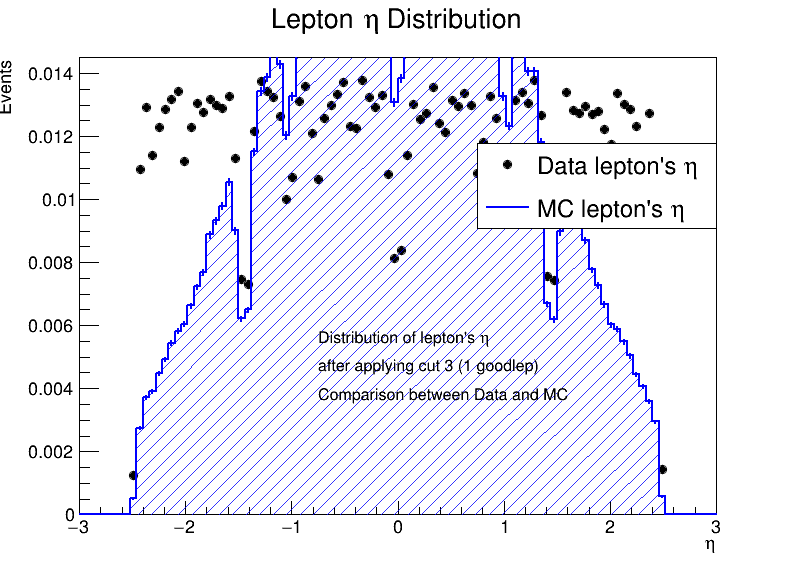

Info in <TCanvas::Print>: pdf file Distribution_lepton_eta_DMC.pdf has been created


In [17]:
TLegend *leg5 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_lep_eta->SetMarkerStyle(20);
data_hist_lep_eta->SetMarkerColor(kBlack);
data_hist_lep_eta->SetStats(0);
mc_hist_lep_eta->SetFillStyle(3454);
mc_hist_lep_eta->SetFillColorAlpha(kBlue, 0.8);
mc_hist_lep_eta->SetLineColor(kBlue);
mc_hist_lep_eta->SetMarkerSize(0);
mc_hist_lep_eta->SetStats(0);
mc_hist_lep_eta->SetLineWidth(2);
data_hist_lep_eta->DrawNormalized("P");
mc_hist_lep_eta->DrawNormalized("sameH");


leg5->AddEntry(data_hist_lep_eta, "Data lepton's #eta", "p");
leg5->AddEntry(mc_hist_lep_eta, "MC lepton's #eta", "l");
leg5->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.4,0.4,"Distribution of lepton's #eta"); // Position of the text in the canvas
l.DrawLatex(0.4,0.35,"after applying cut 3 (1 goodlep)");
l.DrawLatex(0.4,0.30,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("Distribution_lepton_eta_DMC.pdf");

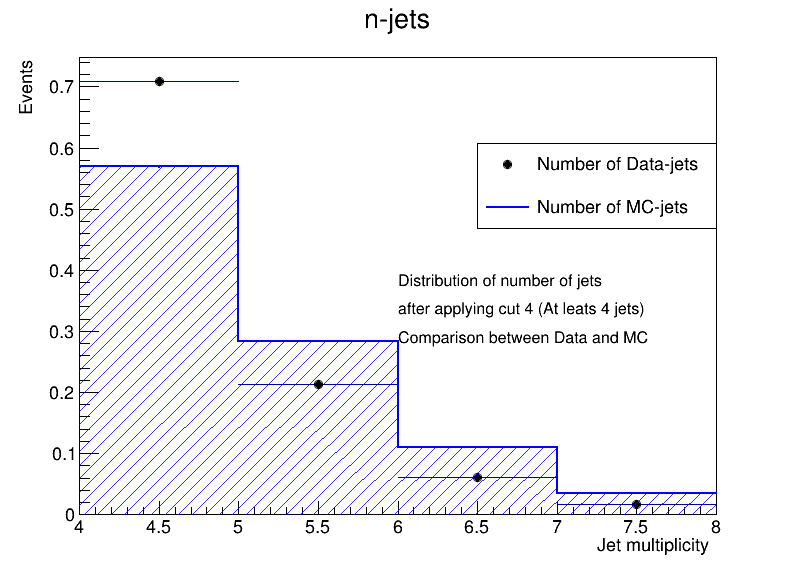

Info in <TCanvas::Print>: pdf file jets_n_DMC.pdf has been created


In [18]:
TLegend *leg6 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_njets->SetMarkerStyle(20);
data_hist_njets->SetMarkerColor(kBlack);
data_hist_njets->SetStats(0);
mc_hist_njets->SetFillStyle(3454);
mc_hist_njets->SetFillColorAlpha(kBlue, 0.8);
mc_hist_njets->SetLineColor(kBlue);
mc_hist_njets->SetMarkerSize(0);
mc_hist_njets->SetStats(0);
mc_hist_njets->SetLineWidth(2);
data_hist_njets->DrawNormalized("P");
mc_hist_njets->DrawNormalized("sameH");
leg6->AddEntry(data_hist_njets, "Number of Data-jets", "p");
leg6->AddEntry(mc_hist_njets, "Number of MC-jets", "l");
leg6->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.5,0.5,"Distribution of number of jets"); // Position of the text in the canvas
l.DrawLatex(0.5,0.45,"after applying cut 4 (At leats 4 jets)");
l.DrawLatex(0.5,0.40,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("jets_n_DMC.pdf");

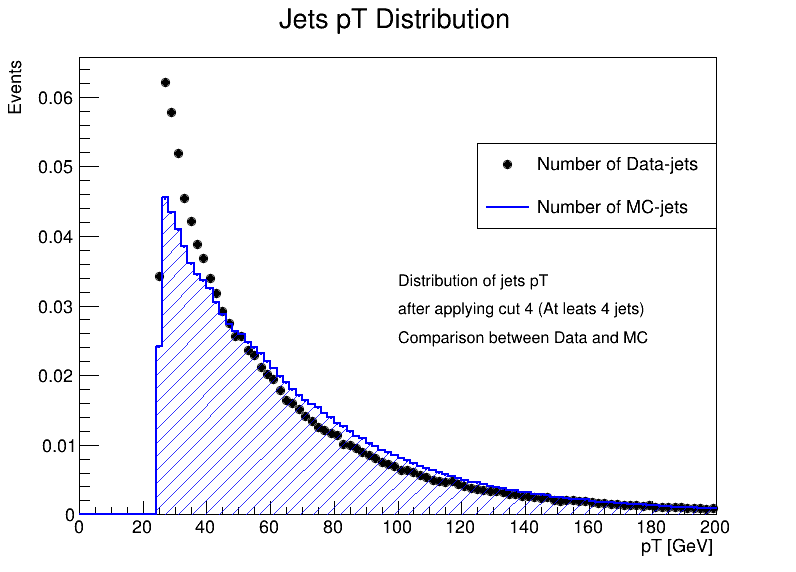

Info in <TCanvas::Print>: pdf file jets_pT_distribution_DMC.pdf has been created


In [19]:
TLegend *leg7 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_jets_pT->SetMarkerStyle(20);
data_hist_jets_pT->SetMarkerColor(kBlack);
data_hist_jets_pT->SetStats(0);
mc_hist_jets_pT->SetFillStyle(3454);
mc_hist_jets_pT->SetFillColorAlpha(kBlue, 0.8);
mc_hist_jets_pT->SetLineColor(kBlue);
mc_hist_jets_pT->SetMarkerSize(0);
mc_hist_jets_pT->SetStats(0);
mc_hist_jets_pT->SetLineWidth(2);
data_hist_jets_pT->DrawNormalized("P");
mc_hist_jets_pT->DrawNormalized("sameH");
leg7->AddEntry(data_hist_jets_pT, "Number of Data-jets", "p");
leg7->AddEntry(mc_hist_jets_pT, "Number of MC-jets", "l");
leg7->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.5,0.5,"Distribution of jets pT"); // Position of the text in the canvas
l.DrawLatex(0.5,0.45,"after applying cut 4 (At leats 4 jets)");
l.DrawLatex(0.5,0.40,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("jets_pT_distribution_DMC.pdf");

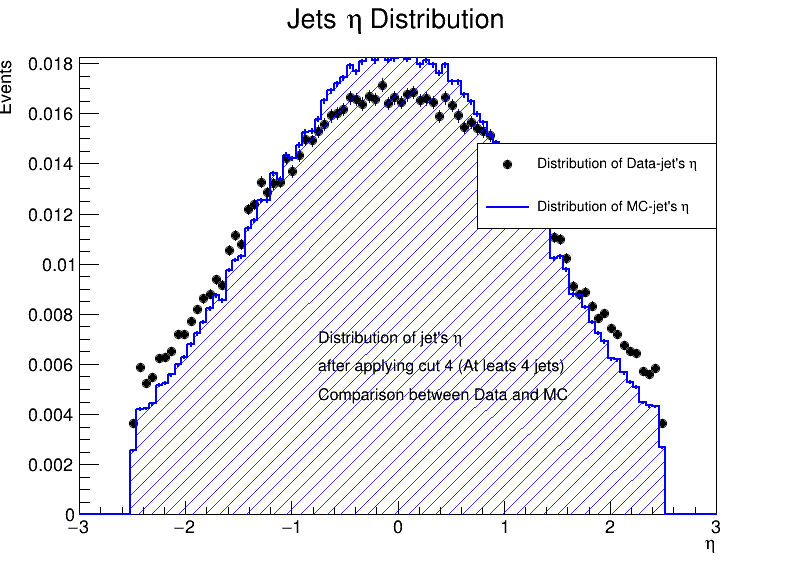

Info in <TCanvas::Print>: pdf file jets_eta_distribution_DMC.pdf has been created


In [20]:
TLegend *leg8 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_jets_eta->SetMarkerStyle(20);
data_hist_jets_eta->SetMarkerColor(kBlack);
data_hist_jets_eta->SetStats(0);
mc_hist_jets_eta->SetFillStyle(3454);
mc_hist_jets_eta->SetFillColorAlpha(kBlue, 0.8);
mc_hist_jets_eta->SetLineColor(kBlue);
mc_hist_jets_eta->SetMarkerSize(0);
mc_hist_jets_eta->SetStats(0);
mc_hist_jets_eta->SetLineWidth(2);
data_hist_jets_eta->DrawNormalized("P");
mc_hist_jets_eta->DrawNormalized("sameH");
leg8->AddEntry(data_hist_jets_eta, "Distribution of Data-jet's #eta", "p");
leg8->AddEntry(mc_hist_jets_eta, "Distribution of MC-jet's #eta", "l");
leg8->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.4,0.4,"Distribution of jet's #eta"); // Position of the text in the canvas
l.DrawLatex(0.4,0.35,"after applying cut 4 (At leats 4 jets)");
l.DrawLatex(0.4,0.30,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("jets_eta_distribution_DMC.pdf");

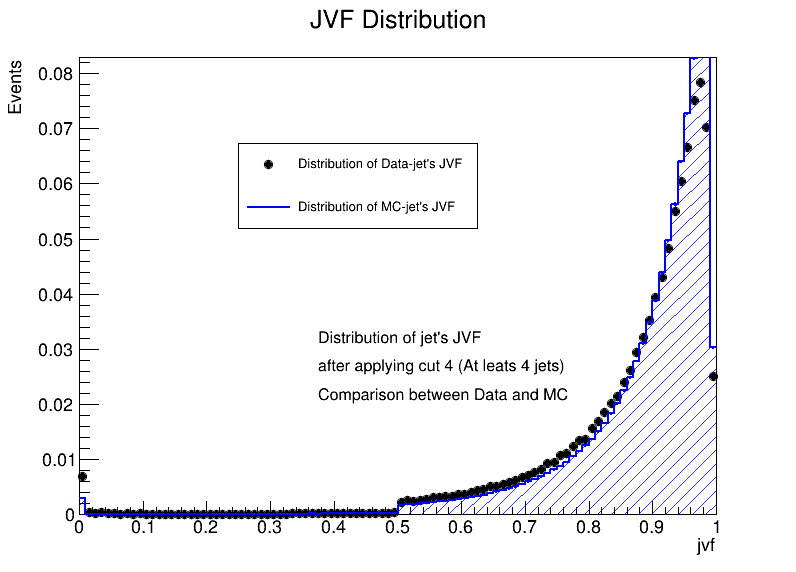

Info in <TCanvas::Print>: pdf file jets_jvf_distribution_DMC.pdf has been created


In [21]:
TLegend *leg9 = new TLegend(0.3, 0.6, 0.6, 0.75);

data_hist_jets_jvf->SetMarkerStyle(20);
data_hist_jets_jvf->SetMarkerColor(kBlack);
data_hist_jets_jvf->SetStats(0);
mc_hist_jets_jvf->SetFillStyle(3454);
mc_hist_jets_jvf->SetFillColorAlpha(kBlue, 0.8);
mc_hist_jets_jvf->SetLineColor(kBlue);
mc_hist_jets_jvf->SetMarkerSize(0);
mc_hist_jets_jvf->SetStats(0);
mc_hist_jets_jvf->SetLineWidth(2);
data_hist_jets_jvf->DrawNormalized("P");
mc_hist_jets_jvf->DrawNormalized("sameH");
leg9->AddEntry(data_hist_jets_jvf, "Distribution of Data-jet's JVF", "p");
leg9->AddEntry(mc_hist_jets_jvf, "Distribution of MC-jet's JVF", "l");
leg9->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.4,0.4,"Distribution of jet's JVF"); // Position of the text in the canvas
l.DrawLatex(0.4,0.35,"after applying cut 4 (At leats 4 jets)");
l.DrawLatex(0.4,0.30,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("jets_jvf_distribution_DMC.pdf");

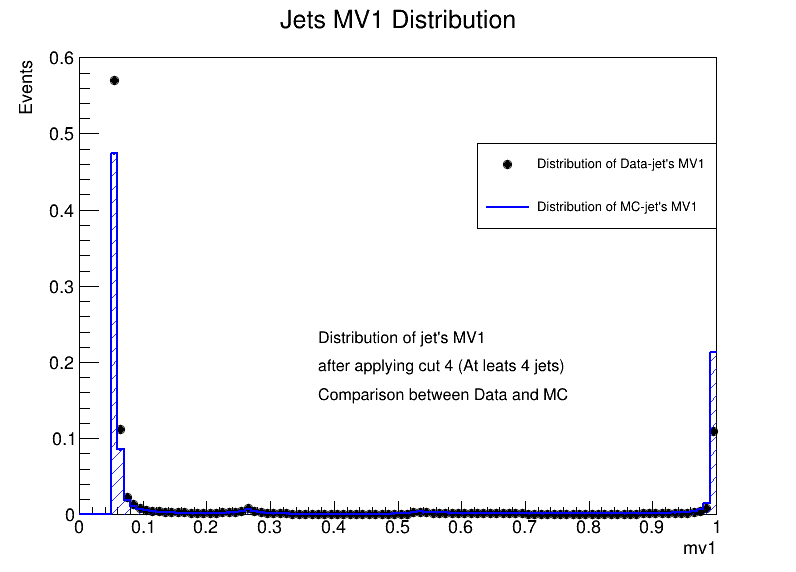

Info in <TCanvas::Print>: pdf file jets_mv1_distribution_DMC.pdf has been created


In [22]:
TLegend *leg10 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_jets_mv1->SetMarkerStyle(20);
data_hist_jets_mv1->SetMarkerColor(kBlack);
data_hist_jets_mv1->SetStats(0);
mc_hist_jets_mv1->SetFillStyle(3454);
mc_hist_jets_mv1->SetFillColorAlpha(kBlue, 0.8);
mc_hist_jets_mv1->SetLineColor(kBlue);
mc_hist_jets_mv1->SetMarkerSize(0);
mc_hist_jets_mv1->SetStats(0);
mc_hist_jets_mv1->SetLineWidth(2);
data_hist_jets_mv1->DrawNormalized("P");
mc_hist_jets_mv1->DrawNormalized("sameH");
leg10->AddEntry(data_hist_jets_mv1, "Distribution of Data-jet's MV1", "p");
leg10->AddEntry(mc_hist_jets_mv1, "Distribution of MC-jet's MV1", "l");
leg10->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.4,0.4,"Distribution of jet's MV1"); // Position of the text in the canvas
l.DrawLatex(0.4,0.35,"after applying cut 4 (At leats 4 jets)");
l.DrawLatex(0.4,0.30,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("jets_mv1_distribution_DMC.pdf");

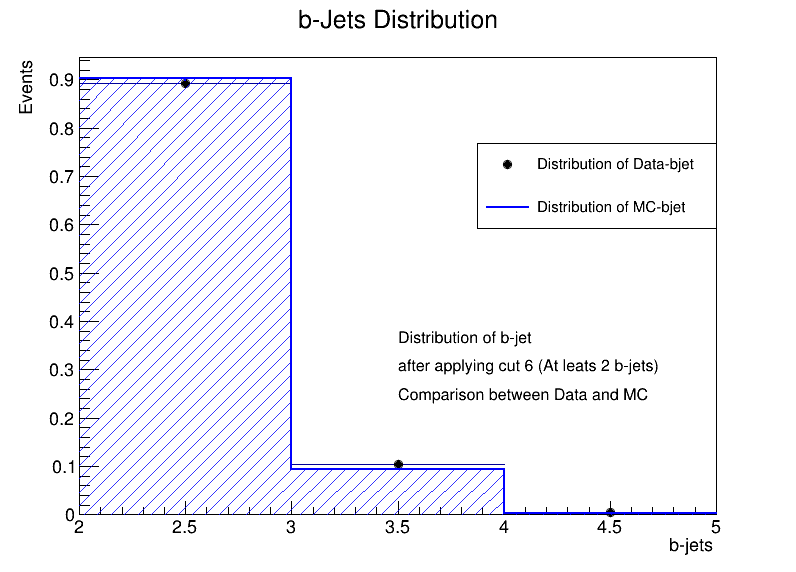

Info in <TCanvas::Print>: pdf file jets_bjets_distribution_DMC.pdf has been created


In [23]:
TLegend *leg11 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_bjets->SetMarkerStyle(20);
data_hist_bjets->SetMarkerColor(kBlack);
data_hist_bjets->SetStats(0);
mc_hist_bjets->SetFillStyle(3454);
mc_hist_bjets->SetFillColorAlpha(kBlue, 0.8);
mc_hist_bjets->SetLineColor(kBlue);
mc_hist_bjets->SetMarkerSize(0);
mc_hist_bjets->SetStats(0);
mc_hist_bjets->SetLineWidth(2);
data_hist_bjets->DrawNormalized("P");
mc_hist_bjets->DrawNormalized("sameH");
leg11->AddEntry(data_hist_bjets, "Distribution of Data-bjet", "p");
leg11->AddEntry(mc_hist_bjets, "Distribution of MC-bjet", "l");
leg11->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.5,0.4,"Distribution of b-jet"); // Position of the text in the canvas
l.DrawLatex(0.5,0.35,"after applying cut 6 (At leats 2 b-jets)");
l.DrawLatex(0.5,0.30,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("jets_bjets_distribution_DMC.pdf");

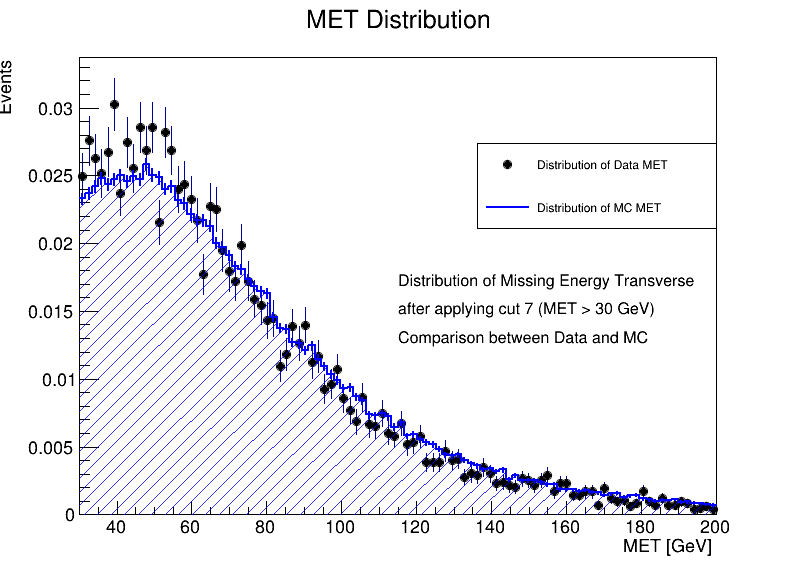

Info in <TCanvas::Print>: pdf file MET_distribution_DMC.pdf has been created


In [24]:
TLegend *leg12 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_MET->SetMarkerStyle(20);
data_hist_MET->SetMarkerColor(kBlack);
data_hist_MET->SetStats(0);
mc_hist_MET->SetFillStyle(3454);
mc_hist_MET->SetFillColorAlpha(kBlue, 0.8);
mc_hist_MET->SetLineColor(kBlue);
mc_hist_MET->SetMarkerSize(0);
mc_hist_MET->SetStats(0);
mc_hist_MET->SetLineWidth(2);
data_hist_MET->DrawNormalized("P");
mc_hist_MET->DrawNormalized("sameH");
leg12->AddEntry(data_hist_MET, "Distribution of Data MET", "p");
leg12->AddEntry(mc_hist_MET, "Distribution of MC MET", "l");
leg12->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.5,0.5,"Distribution of Missing Energy Transverse"); // Position of the text in the canvas
l.DrawLatex(0.5,0.45,"after applying cut 7 (MET > 30 GeV)");
l.DrawLatex(0.5,0.40,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("MET_distribution_DMC.pdf");

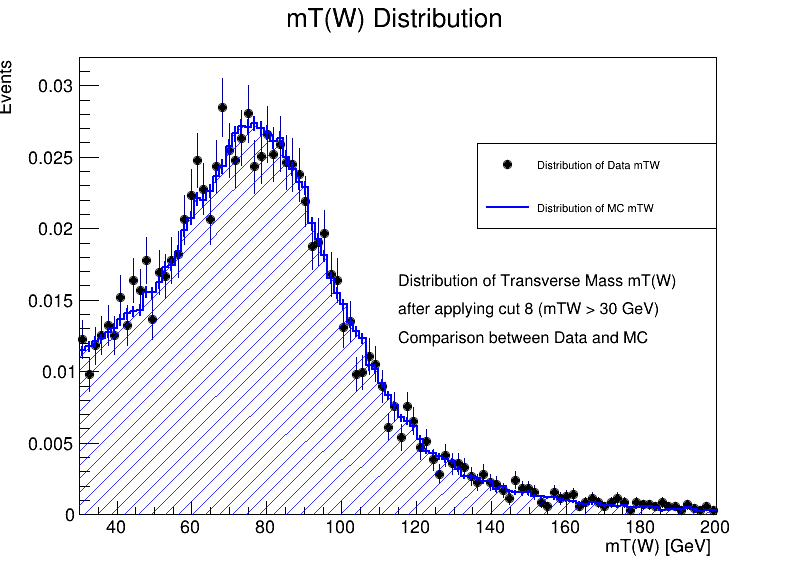

Info in <TCanvas::Print>: pdf file mtw_distribution_DMC.pdf has been created


In [25]:
TLegend *leg13 = new TLegend(0.6, 0.6, 0.9, 0.75);

data_hist_mTw->SetMarkerStyle(20);
data_hist_mTw->SetMarkerColor(kBlack);
data_hist_mTw->SetStats(0);
mc_hist_mTw->SetFillStyle(3454);
mc_hist_mTw->SetFillColorAlpha(kBlue, 0.8);
mc_hist_mTw->SetLineColor(kBlue);
mc_hist_mTw->SetMarkerSize(0);
mc_hist_mTw->SetStats(0);
mc_hist_mTw->SetLineWidth(2);
data_hist_mTw->DrawNormalized("P");
mc_hist_mTw->DrawNormalized("sameH");
leg13->AddEntry(data_hist_MET, "Distribution of Data mTW", "p");
leg13->AddEntry(mc_hist_MET, "Distribution of MC mTW", "l");
leg13->Draw();

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.03);  
l.DrawLatex(0.5,0.5,"Distribution of Transverse Mass mT(W)"); // Position of the text in the canvas
l.DrawLatex(0.5,0.45,"after applying cut 8 (mTW > 30 GeV)");
l.DrawLatex(0.5,0.40,"Comparison between Data and MC");

canvas->Draw();
canvas->Print("mtw_distribution_DMC.pdf");